In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

import numpy as np

In [7]:
data = pd.read_json("non_flwr_n_trs.json")

In [8]:
keys = data["url"].values
values_ = data["params"].values

In [9]:
url_params = {}
for i in range(len(data)):
    url_params[keys[i]] = values_[i].split("\n")

In [10]:
tmp =url_params[keys[0]][0]
end = tmp.find("：")
print(tmp[0:end])

商品名称


In [11]:
url_params[keys[0]]

['商品名称：乡语小吖阳光玫瑰',
 '商品编号：100044776042',
 '商品毛重：1.0kg',
 '商品产地：中国大陆',
 '品种：阳光玫瑰',
 '原产地：山东',
 '贮存条件：冷藏',
 '国产/进口：国产']

In [12]:
param_total_list = []
for param_list in url_params.values():
    for param in param_list:
        end = param.find("：")
        param_total_list.append(param[0:end])

In [13]:
param_fre = pd.Series(data=param_total_list).value_counts()

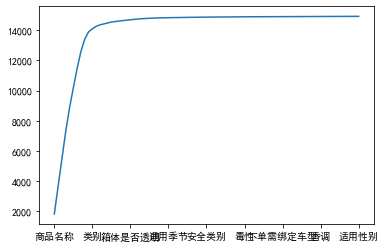

In [47]:
param_cum = param_fre.cumsum()
param_cum.plot(kind="line")
plt.show()

In [17]:
param_cum[param_cum<=14000].index.values.tolist()

array(['商品名称', '商品毛重', '商品编号', '店铺', '国产/进口', '原产地', '品种', '贮存条件', '货号',
       '商品产地'], dtype=object)

In [25]:
for item in url_params.items():
    print(item)
    break

('https://item.jd.com/100044776042.html', ['商品名称：乡语小吖阳光玫瑰', '商品编号：100044776042', '商品毛重：1.0kg', '商品产地：中国大陆', '品种：阳光玫瑰', '原产地：山东', '贮存条件：冷藏', '国产/进口：国产'])


In [64]:
list_of_dict = []
param_columns = param_cum[param_cum<=14000].index.values.tolist()
for item in url_params.items():
    tmp_dict = {"url":np.nan, "商品名称":np.nan, "商品毛重":np.nan, "商品编号":np.nan, "店铺":np.nan, "国产/进口":np.nan, "原产地":np.nan, "品种": np.nan,"贮存条件":np.nan, "货号":np.nan}
    tmp_dict["url"] = item[0]
    param_list = item[1]
    for param in param_list:
        colon_index = param.find("：")
        key = param[0:colon_index]
        value = param[colon_index+1:]
        if key in param_columns:
            tmp_dict[key]=value
    list_of_dict.append(tmp_dict)

In [65]:
detail_param_splited = pd.DataFrame(list_of_dict)

In [70]:
len(detail_param_splited)

1825

<AxesSubplot:>

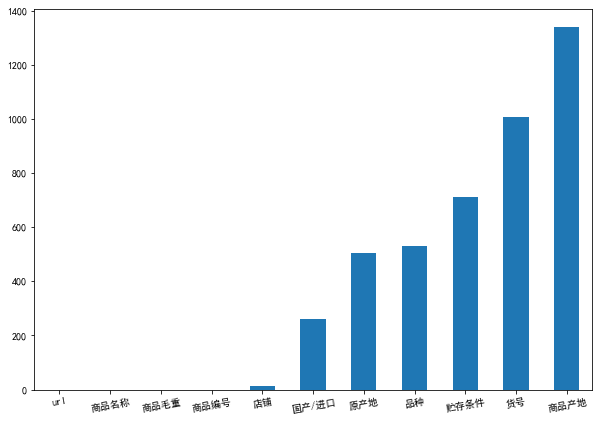

In [67]:
detail_param_splited.isna().sum().plot(kind="bar",rot=10,figsize=(10,7))

<AxesSubplot:>

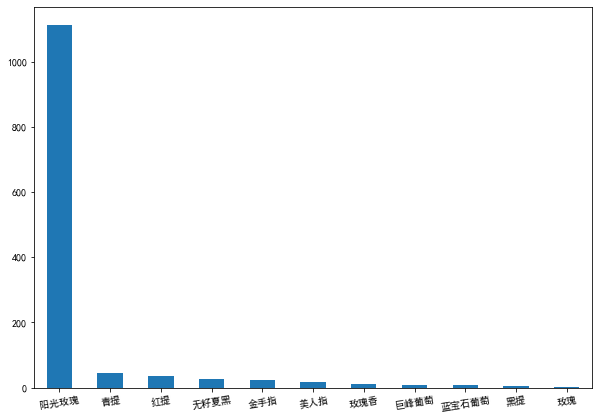

In [68]:
detail_param_splited["品种"].value_counts().plot(kind="bar",rot=9,figsize=(10,7))

In [69]:
detail_param_splited.to_json("detail_param_splited.json", orient='records')

In [ ]:
param_cum()

In [27]:
for item in url_params:
    print(item)
    break

https://item.jd.com/100044776042.html


In [17]:
keyword = "商品毛重："

In [19]:
start = tmp.find(keyword)+len(keyword)
end = tmp.find("\n", tmp.find(keyword)) 
tmp[start:end]

'100052717883'